In [1]:
from google.colab import files
uploaded = files.upload()


Saving Synthetic_Customer_Behavior.xlsx to Synthetic_Customer_Behavior.xlsx


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels pymc arviz openpyxl --quiet


In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Sklearn preprocessing & models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Statsmodels
import statsmodels.api as sm

# Bayesian modeling
import pymc as pm
import arviz as az

# Display settings
pd.set_option('display.max_columns', None)


In [4]:
df = pd.read_excel("Synthetic_Customer_Behavior.xlsx")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (50000, 15)


,Customer_ID,Age,Gender,Country,Income,Website_Visits,App_Opens,Support_Tickets,Avg_Session_Duration_Minutes,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Days_Ago,Satisfaction_Score,Likelihood_to_Recommend,Churn
0,CUST000001,56,Male,Belarus,36715.71,34,16,3,20.14,4,102.60,33,6.6,2.1,0
1,CUST000002,69,Female,Equatorial Guinea,51544.66,23,13,0,15.88,7,149.26,90,5.0,5.8,0
2,CUST000003,46,Male,Iceland,61670.94,21,15,0,9.62,2,73.94,158,5.7,10.0,0
3,CUST000004,32,Male,Chad,57930.00,14,8,2,17.51,4,64.74,212,7.4,6.9,0
4,CUST000005,60,Male,Monaco,67324.13,15,16,1,11.24,7,143.90,166,6.8,1.6,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_ID                   50000 non-null  object 
 1   Age                           50000 non-null  int64  
 2   Gender                        50000 non-null  object 
 3   Country                       50000 non-null  object 
 4   Income                        50000 non-null  float64
 5   Website_Visits                50000 non-null  int64  
 6   App_Opens                     50000 non-null  int64  
 7   Support_Tickets               50000 non-null  int64  
 8   Avg_Session_Duration_Minutes  50000 non-null  float64
 9   Total_Purchases               50000 non-null  int64  
 10  Avg_Purchase_Value            50000 non-null  float64
 11  Last_Purchase_Days_Ago        50000 non-null  int64  
 12  Satisfaction_Score            50000 non-null  float64
 13  L

In [6]:
df.describe()


,Age,Income,Website_Visits,App_Opens,Support_Tickets,Avg_Session_Duration_Minutes,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Days_Ago,Satisfaction_Score,Likelihood_to_Recommend,Churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,46.012240,60049.531996,20.034640,15.015400,1.004280,14.986758,5.000440,100.815453,181.453560,6.952528,5.885996,0.14618
std,16.414894,19960.667031,4.468633,3.856711,1.001839,5.004721,2.230628,49.094169,105.329087,1.884156,2.701929,0.35329
min,18.000000,10000.000000,4.000000,1.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.00000
25%,32.000000,46378.617500,17.000000,12.000000,0.000000,11.610000,3.000000,66.470000,90.000000,5.700000,4.000000,0.00000
50%,46.000000,59923.820000,20.000000,15.000000,1.000000,15.000000,5.000000,100.205000,181.000000,7.000000,6.000000,0.00000
75%,60.000000,73505.892500,23.000000,18.000000,2.000000,18.370000,6.000000,134.290000,273.000000,8.400000,8.000000,0.00000
max,74.000000,147131.690000,43.000000,34.000000,7.000000,35.240000,17.000000,299.080000,364.000000,10.000000,10.000000,1.00000


In [7]:
df.isnull().sum()


,0
Customer_ID,0
Age,0
Gender,0
Country,0
Income,0
Website_Visits,0
App_Opens,0
Support_Tickets,0
Avg_Session_Duration_Minutes,0
Total_Purchases,0


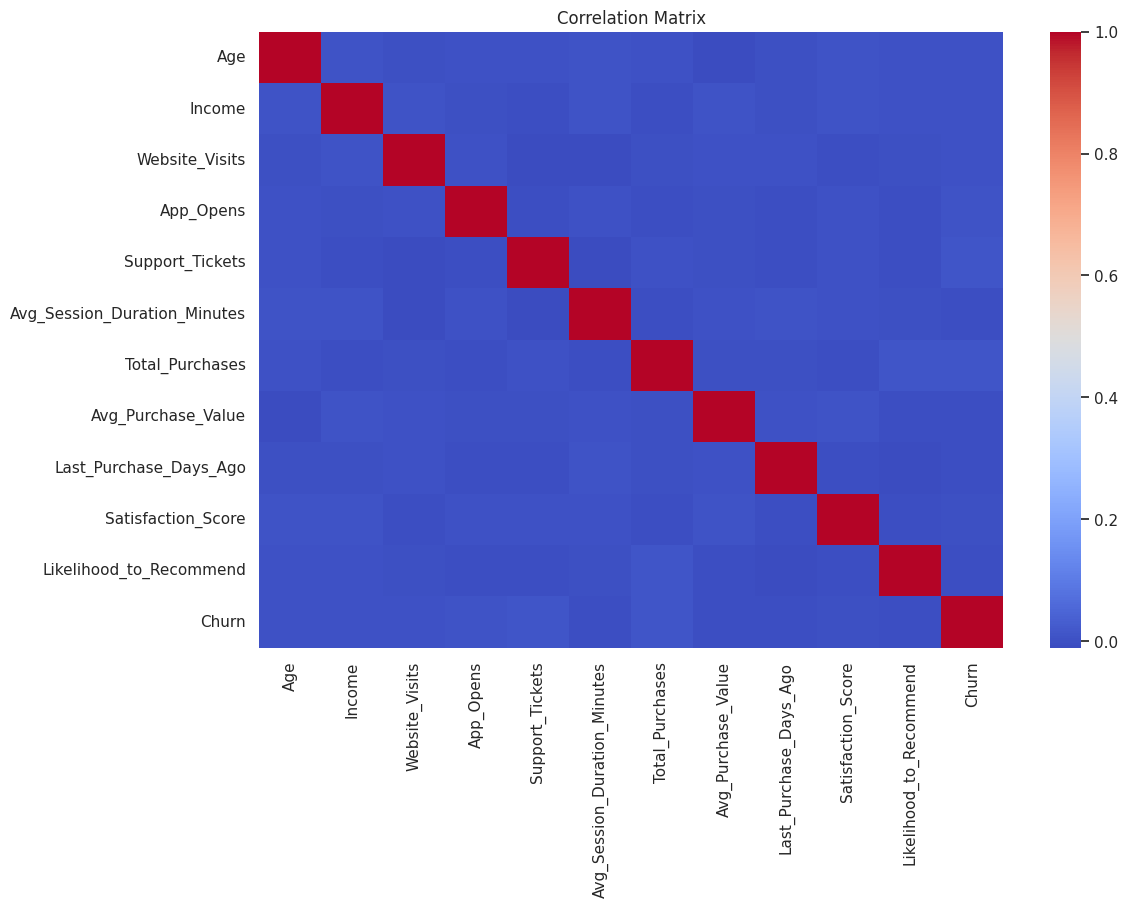

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            cmap="coolwarm",
            annot=False)
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

numeric_df.head()


,Age,Income,Website_Visits,App_Opens,Support_Tickets,Avg_Session_Duration_Minutes,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Days_Ago,Satisfaction_Score,Likelihood_to_Recommend,Churn
0,56,36715.71,34,16,3,20.14,4,102.60,33,6.6,2.1,0
1,69,51544.66,23,13,0,15.88,7,149.26,90,5.0,5.8,0
2,46,61670.94,21,15,0,9.62,2,73.94,158,5.7,10.0,0
3,32,57930.00,14,8,2,17.51,4,64.74,212,7.4,6.9,0
4,60,67324.13,15,16,1,11.24,7,143.90,166,6.8,1.6,0


In [10]:
features = numeric_df.drop(columns=["Churn"])

features.head()


,Age,Income,Website_Visits,App_Opens,Support_Tickets,Avg_Session_Duration_Minutes,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Days_Ago,Satisfaction_Score,Likelihood_to_Recommend
0,56,36715.71,34,16,3,20.14,4,102.60,33,6.6,2.1
1,69,51544.66,23,13,0,15.88,7,149.26,90,5.0,5.8
2,46,61670.94,21,15,0,9.62,2,73.94,158,5.7,10.0
3,32,57930.00,14,8,2,17.51,4,64.74,212,7.4,6.9
4,60,67324.13,15,16,1,11.24,7,143.90,166,6.8,1.6


In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()


,Age,Income,Website_Visits,App_Opens,Support_Tickets,Avg_Session_Duration_Minutes,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Days_Ago,Satisfaction_Score,Likelihood_to_Recommend
0,0.608463,-1.169002,3.125229,0.255298,1.992076,1.029687,-0.448506,0.036350,-1.409440,-0.187103,-1.401234
1,1.400435,-0.426086,0.663601,-0.522575,-1.002446,0.178482,0.896420,0.986778,-0.868274,-1.036298,-0.031828
2,-0.000746,0.081231,0.216032,-0.003993,-1.002446,-1.072350,-1.345124,-0.547432,-0.222672,-0.664775,1.522633
3,-0.853638,-0.106186,-1.350458,-1.819029,0.993902,0.504177,-0.448506,-0.734829,0.290012,0.237494,0.375293
4,0.852147,0.364450,-1.126674,0.255298,-0.004272,-0.748652,0.896420,0.877599,-0.146718,-0.080954,-1.586289


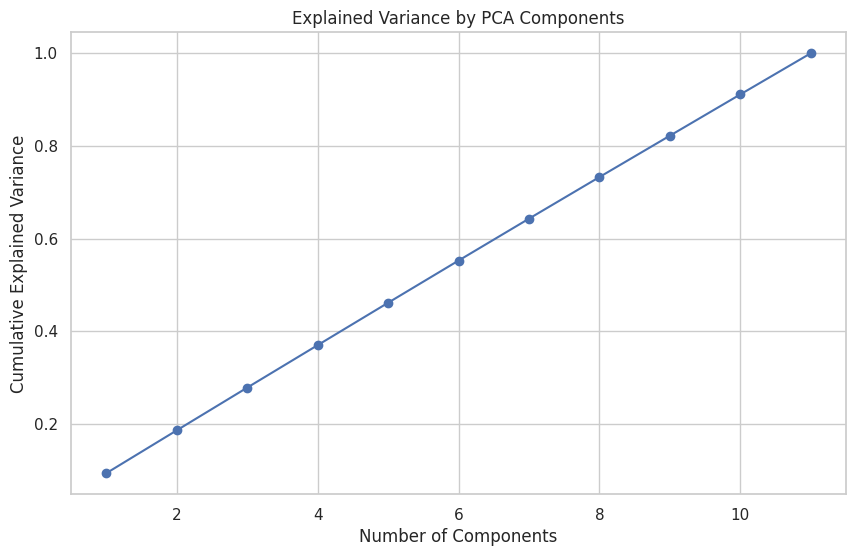

In [12]:
pca = PCA()
pca.fit(scaled_df)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance.cumsum(),
         marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()


In [13]:
pca_opt = PCA(n_components=5)
principal_components = pca_opt.fit_transform(scaled_df)

pca_df = pd.DataFrame(principal_components,
                      columns=[f"PC{i+1}" for i in range(5)])

pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,-0.411627,-0.478646,0.785193,-1.814327,-0.134622
1,0.429559,0.075932,-1.304822,0.190407,0.512832
2,0.514518,-0.287593,-1.400408,-1.087926,-0.399483
3,0.809621,0.449949,1.224357,1.165579,0.228774
4,-0.214971,0.186100,0.992707,0.336472,0.311908


In [14]:
loadings = pd.DataFrame(
    pca_opt.components_.T,
    columns=[f"PC{i+1}" for i in range(5)],
    index=features.columns
)

loadings


,PC1,PC2,PC3,PC4,PC5
Age,-0.070905,0.547240,-0.145837,-0.011442,-0.133740
Income,-0.388348,0.166150,-0.274633,-0.037942,0.358413
Website_Visits,-0.149847,-0.393783,-0.366584,-0.388031,0.161942
App_Opens,-0.244719,0.073743,-0.084395,-0.322383,-0.433936
Support_Tickets,0.223180,0.169623,0.591943,-0.048711,0.149145
Avg_Session_Duration_Minutes,-0.361827,0.319856,-0.146299,0.478891,-0.189065
Total_Purchases,0.434948,0.082814,-0.126142,0.323169,0.265698
Avg_Purchase_Value,-0.305394,-0.190058,0.053772,0.194217,0.588501
Last_Purchase_Days_Ago,-0.197048,-0.334929,0.017190,0.585022,-0.210782
Satisfaction_Score,-0.361904,0.361391,0.328402,-0.166064,0.283437


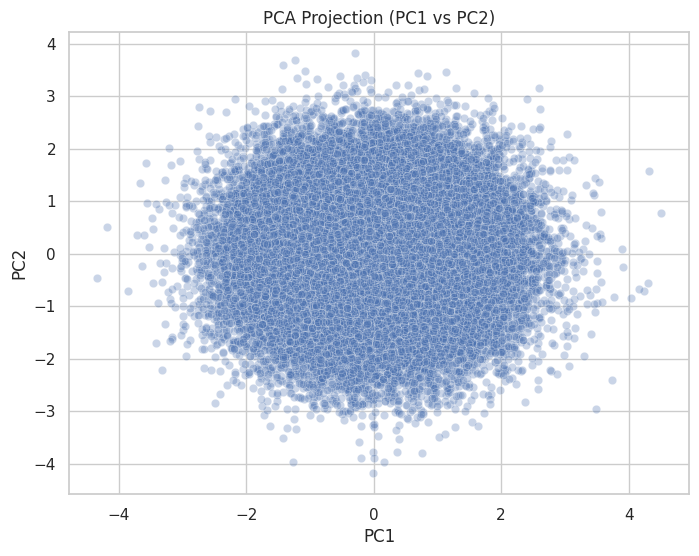

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df["PC1"],
                y=pca_df["PC2"],
                alpha=0.3)

plt.title("PCA Projection (PC1 vs PC2)")
plt.show()


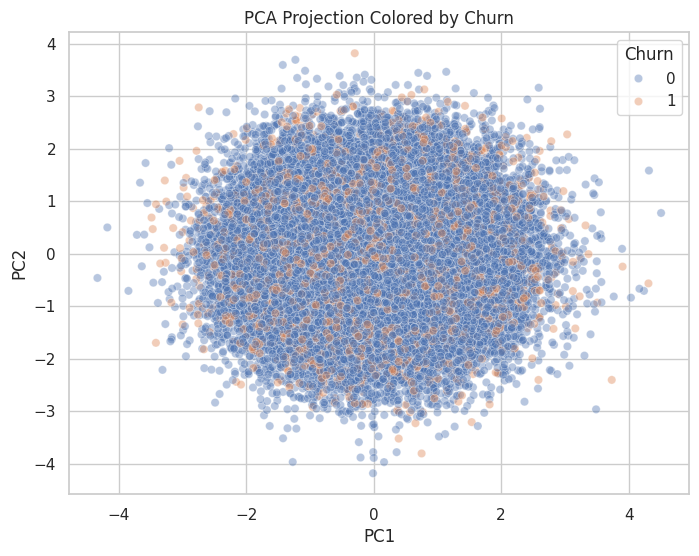

In [16]:
pca_df["Churn"] = df["Churn"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df,
                x="PC1",
                y="PC2",
                hue="Churn",
                alpha=0.4)

plt.title("PCA Projection Colored by Churn")
plt.show()


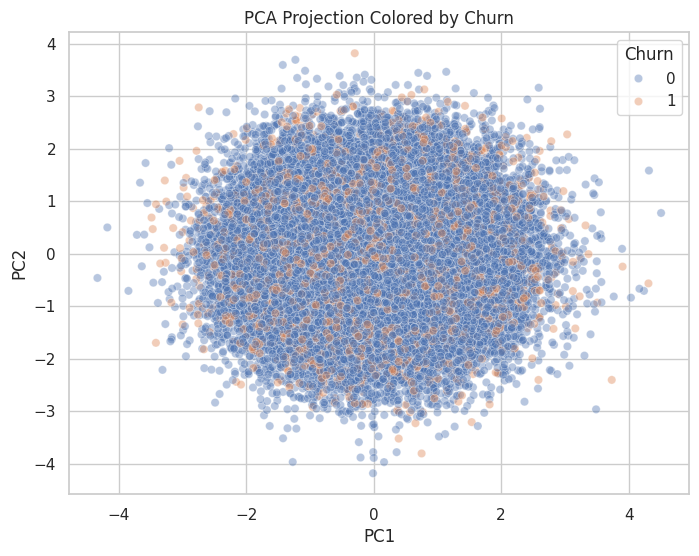

In [17]:
pca_df["Churn"] = df["Churn"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df,
                x="PC1",
                y="PC2",
                hue="Churn",
                alpha=0.4)

plt.title("PCA Projection Colored by Churn")
plt.show()


In [18]:
# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

variance_df = pd.DataFrame({
    "Component": range(1, len(explained_variance) + 1),
    "Explained_Variance": explained_variance,
    "Cumulative_Variance": cumulative_variance
})

variance_df.head(15)


,Component,Explained_Variance,Cumulative_Variance
0,1,0.093262,0.093262
1,2,0.092526,0.185788
2,3,0.092234,0.278022
3,4,0.091682,0.369704
4,5,0.091562,0.461266
5,6,0.091089,0.552355
6,7,0.090479,0.642833
7,8,0.089838,0.732671
8,9,0.089305,0.821976
9,10,0.089179,0.911155


In [19]:
components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print("Number of components explaining at least 80% variance:", components_80)


Number of components explaining at least 80% variance: 9


In [20]:
# Use the loadings from your optimized PCA (pca_opt)
loadings = pd.DataFrame(
    pca_opt.components_.T,
    columns=[f"PC{i+1}" for i in range(pca_opt.n_components_)],
    index=features.columns
)

# Get top 5 variables by absolute loading for PC1 and PC2
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(5)
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(5)

print("Top 5 variables contributing to PC1:")
print(loadings.loc[top_pc1.index, "PC1"])
print("\n")

print("Top 5 variables contributing to PC2:")
print(loadings.loc[top_pc2.index, "PC2"])


Top 5 variables contributing to PC1:
Total_Purchases                 0.434948
Income                         -0.388348
Satisfaction_Score             -0.361904
Avg_Session_Duration_Minutes   -0.361827
Likelihood_to_Recommend         0.358944
Name: PC1, dtype: float64


Top 5 variables contributing to PC2:
Age                             0.547240
Website_Visits                 -0.393783
Satisfaction_Score              0.361391
Last_Purchase_Days_Ago         -0.334929
Avg_Session_Duration_Minutes    0.319856
Name: PC2, dtype: float64


In [21]:
!pip install factor_analyzer --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [22]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


In [23]:
chi_square_value, p_value = calculate_bartlett_sphericity(scaled_df)
print("Bartlett’s Test p-value:", p_value)


Bartlett’s Test p-value: 0.13034377385989926


In [24]:
kmo_all, kmo_model = calculate_kmo(scaled_df)
print("Overall KMO Score:", kmo_model)


Overall KMO Score: 0.5001091180686945


In [25]:
fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_df)

eigenvalues, _ = fa.get_eigenvalues()

eigen_df = pd.DataFrame({
    "Factor": range(1, len(eigenvalues)+1),
    "Eigenvalue": eigenvalues
})

eigen_df.head(15)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor,Eigenvalue
0,1,1.025879
1,2,1.017787
2,3,1.014574
3,4,1.008504
4,5,1.007178
5,6,1.001982
6,7,0.995264
7,8,0.988218
8,9,0.982354
9,10,0.980967


In [26]:
num_factors = sum(eigenvalues > 1)
print("Number of factors (Eigenvalue > 1):", num_factors)


Number of factors (Eigenvalue > 1): 6


In [27]:
fa = FactorAnalyzer(n_factors=num_factors, rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(
    fa.loadings_,
    index=scaled_df.columns,
    columns=[f"Factor{i+1}" for i in range(num_factors)]
)

loadings


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Age,-0.000252,-0.012752,-0.002600,0.016122,0.023468,0.099739
Income,0.006831,0.006513,0.000216,-0.013968,-0.013885,0.074175
Website_Visits,0.993432,0.002405,0.001070,-0.020229,-0.014581,-0.003250
App_Opens,0.001527,-0.002692,-0.006938,-0.024437,-0.038335,0.020436
Support_Tickets,-0.004590,-0.002215,-0.004517,0.176392,0.004198,-0.006919
Avg_Session_Duration_Minutes,-0.008899,0.003206,0.009807,-0.035668,-0.017546,0.072797
Total_Purchases,-0.000942,0.002013,0.003237,0.024179,0.098831,-0.018904
Avg_Purchase_Value,0.001700,0.697823,0.003124,-0.004795,-0.000353,0.013793
Last_Purchase_Days_Ago,0.000501,0.002180,0.496091,-0.008889,-0.006427,0.005966
Satisfaction_Score,-0.004613,0.009841,-0.012847,0.025915,-0.053137,0.068141


In [28]:
strong_loadings = loadings.copy()

# Keep only loadings with magnitude > 0.4
strong_loadings = strong_loadings.where(abs(strong_loadings) > 0.4)

strong_loadings


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Age,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN
Website_Visits,0.993432,NaN,NaN,NaN,NaN,NaN
App_Opens,NaN,NaN,NaN,NaN,NaN,NaN
Support_Tickets,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Session_Duration_Minutes,NaN,NaN,NaN,NaN,NaN,NaN
Total_Purchases,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Purchase_Value,NaN,0.697823,NaN,NaN,NaN,NaN
Last_Purchase_Days_Ago,NaN,NaN,0.496091,NaN,NaN,NaN
Satisfaction_Score,NaN,NaN,NaN,NaN,NaN,NaN
